In [48]:
# !pip install tqdm

In [1]:
from tqdm import tqdm

In [2]:
import geopandas as gpd

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
INPUT_FILE = "data/BedrockP.shp"
bedrock_data = gpd.read_file(INPUT_FILE)
bedrock_data.head()

,gid,upid,area_m2,strat_unit,era,period,strat_age,strat_name,gp_suite,fm_lithodm,mem_phase,rock_class,rock_type,rk_char,unit_desc,age_max,age_min,belt,terrane,basin,basin_age,project,src_url,src_ref_s,map_comp,edit_date,pub_org,geometry
0,33649.0,9c192ffb,4368828.0,uKPCvl,Mesozoic,Cretaceous,Upper Cretaceous,Powell Creek Formation - upper unit,None,Powell Creek Formation,upper unit,volcanic rocks,coarse volcaniclastic and pyroclastic volcanic...,None,"Well stratified lapilli tuff, volcanic breccia...",Santonian,Campanian,Coast,Overlap,None,None,Chilcotin-Bonaparte,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza et al., 1997, Chilcotin-Bonaparte, ...","Schiarizza, 2017, Chicotin-Bonaparte",2018-04-05,British Columbia Geological Survey,"POLYGON ((466212.803 5669781.240, 466385.735 5..."
1,26344.0,824df15e,34431394.0,lKGsv,Mesozoic,Cretaceous,Lower Cretaceous,Gambier Group,Gambier Group,None,None,sedimentary rocks,marine sedimentary and volcanic rocks,None,Undifferentiated Gambier Group volcanic and se...,Lower Cretaceous,Mid-Cretaceous,Coast,Overlap,None,None,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((541326.012 5529535.059, 541118.840 5..."
2,29100.0,2f4fa4a6,74490974.0,lKGsv,Mesozoic,Cretaceous,Lower Cretaceous,Gambier Group,Gambier Group,None,None,sedimentary rocks,marine sedimentary and volcanic rocks,None,Undifferentiated Gambier Group volcanic and se...,Lower Cretaceous,Mid-Cretaceous,Coast,Overlap,None,None,Mid-coast,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Bellefontaine et al., 1994, Mid-coast, BCGS, O...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((541118.840 5528958.183, 541326.012 5..."
3,18121.0,8c3e4237,28858519.0,JKCsf,Mesozoic,Jurassic to Cretaceous,Jurassic to Cretaceous,Cayoosh assemblage?,Cayoosh assemblage?,None,None,sedimentary rocks,"mudstone, siltstone, shale fine clastic sedime...",None,"Siltstone, argillite, slate; lesser sandstone,...",Jurassic,Cretaceous,Coast,Bridge River,None,None,Okanagan,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza and Church., 1996, Okanagan, BCGS, ...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((508143.471 5601807.482, 508301.595 5..."
4,18113.0,d7681ec3,38898103.0,Mivb,Cenozoic,Neogene,Miocene,None,None,None,None,volcanic rocks,basaltic volcanic rocks,None,Basalt flows and breccia; locally intercalated...,Miocene,Miocene,Coast,Younger Volcanics,None,None,Okanagan,http://www.em.gov.bc.ca/Mining/Geoscience/Publ...,"Schiarizza and Church., 1996, Okanagan, BCGS, ...","Massey et al., 2005, BC",2018-04-05,British Columbia Geological Survey,"POLYGON ((508835.893 5603890.448, 508674.020 5..."


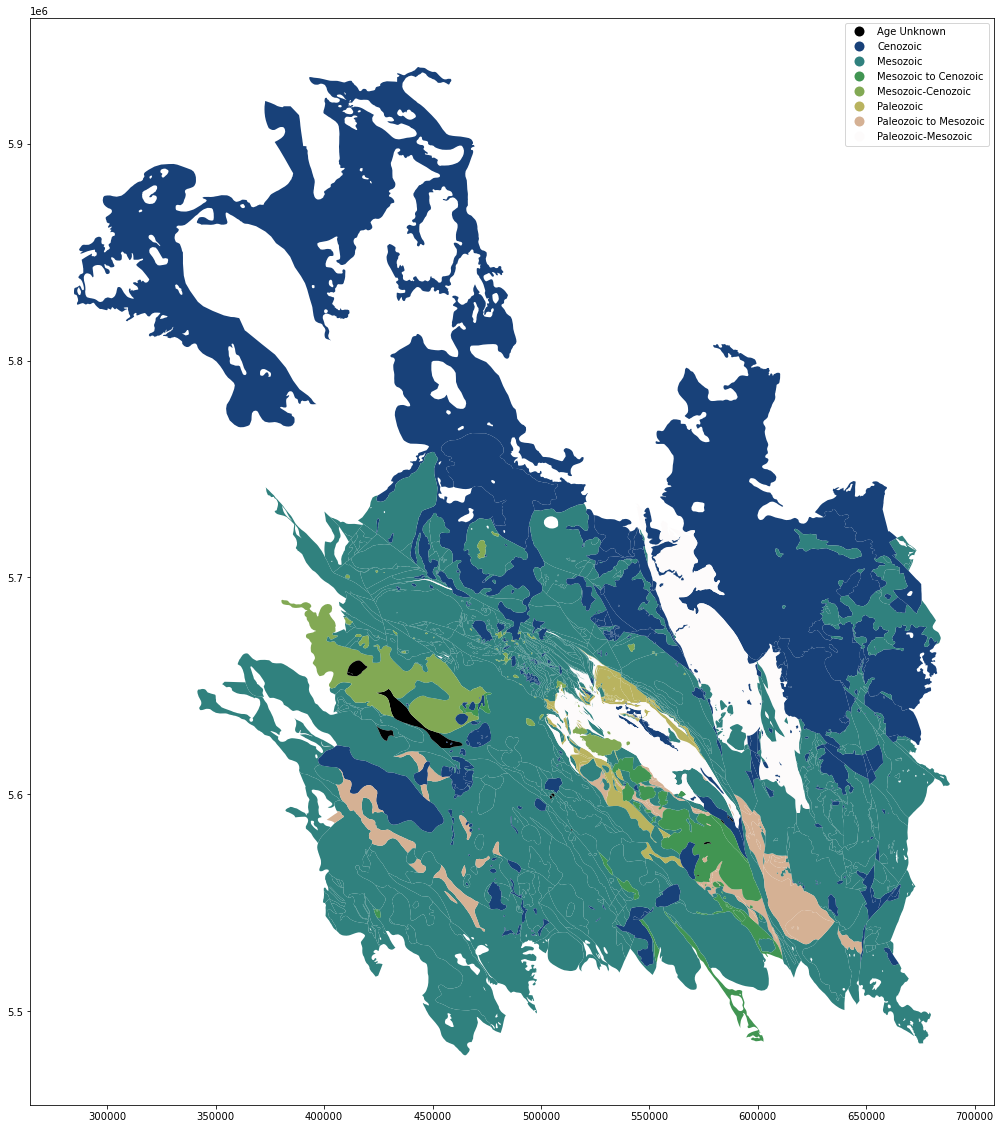

In [6]:
bedrock_data.plot(column="era", categorical=True, legend=True, figsize=(20,20), cmap='gist_earth')

In [7]:
bedrock_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         1596 non-null   float64 
 1   upid        1596 non-null   object  
 2   area_m2     1596 non-null   float64 
 3   strat_unit  1596 non-null   object  
 4   era         1596 non-null   object  
 5   period      1596 non-null   object  
 6   strat_age   1596 non-null   object  
 7   strat_name  1184 non-null   object  
 8   gp_suite    1036 non-null   object  
 9   fm_lithodm  443 non-null    object  
 10  mem_phase   76 non-null     object  
 11  rock_class  1596 non-null   object  
 12  rock_type   1596 non-null   object  
 13  rk_char     2 non-null      object  
 14  unit_desc   1596 non-null   object  
 15  age_max     1596 non-null   object  
 16  age_min     1596 non-null   object  
 17  belt        1596 non-null   object  
 18  terrane     1596 non-null   object  
 19

In [8]:
# bedrock_data = bedrock_data.to_crs('EPSG:4326')

In [9]:
bedrock_data.geometry.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Segmenting Data Based on Rock Type

In [10]:
rocks_of_interest = {'serpentinite':[],'granodiorite':[]}
for t in bedrock_data.rock_type.unique():
    if 'ultramafic' in t or 'serpentinite' in t:
        rocks_of_interest['serpentinite'].append(t)
    elif 'granodiorite' in t:
        rocks_of_interest['granodiorite'].append(t)
        
for ud in bedrock_data.unit_desc.unique():
    if 'granodiorite' in ud:
        rocks_of_interest['granodiorite'].extend(list(bedrock_data.loc[bedrock_data['unit_desc']==ud, 'rock_type'].unique()))
    elif 'ultramafic' in ud or 'serpentinite' in ud:
        rocks_of_interest['serpentinite'].extend(list(bedrock_data.loc[bedrock_data['unit_desc']==ud, 'rock_type'].unique()))
        
for rock in rocks_of_interest:
    rocks_of_interest[rock] = list(set(rocks_of_interest[rock]))
    
rocks_of_interest['granodiorite'] = list(set(rocks_of_interest['granodiorite'] ))    

In [11]:
rocks_of_interest['granodiorite']

['granite, alkali feldspar granite intrusive rocks',
 'feldspar porphyritic intrusive rocks',
 'quartz monzonitic intrusive rocks',
 'quartz dioritic intrusive rocks',
 'metamorphic rocks undivided',
 'bimodal volcanic rocks',
 'granodioritic intrusive rocks',
 'dioritic intrusive rocks',
 'tonalite intrusive rocks']

In [12]:
rock_to_sp = {v: k for k in rocks_of_interest for v in rocks_of_interest[k]}

In [13]:
rock_to_sp

{'marine sedimentary and volcanic rocks': 'serpentinite',
 'lower amphibolite/kyanite grade metamorphic rocks': 'serpentinite',
 'serpentinite ultramafic rocks': 'serpentinite',
 'chert, siliceous argillite, siliciclastic rocks': 'serpentinite',
 'ultramafic rocks': 'serpentinite',
 'mid amphibolite/andalusite grade metamorphic rocks': 'serpentinite',
 'gabbroic to dioritic intrusive rocks': 'serpentinite',
 'granite, alkali feldspar granite intrusive rocks': 'granodiorite',
 'feldspar porphyritic intrusive rocks': 'granodiorite',
 'quartz monzonitic intrusive rocks': 'granodiorite',
 'quartz dioritic intrusive rocks': 'granodiorite',
 'metamorphic rocks undivided': 'granodiorite',
 'bimodal volcanic rocks': 'granodiorite',
 'granodioritic intrusive rocks': 'granodiorite',
 'dioritic intrusive rocks': 'granodiorite',
 'tonalite intrusive rocks': 'granodiorite'}

# Adding extra column to slice data based on serpentinite_or_granodiorite

In [14]:
bedrock_data['serpentinite_or_granodiorite'] = bedrock_data['rock_type']

In [15]:
bedrock_data.replace({"serpentinite_or_granodiorite": rock_to_sp}, inplace=True)

In [16]:
bedrock_data.loc[~bedrock_data['serpentinite_or_granodiorite'].isin(['serpentinite','granodiorite']),'serpentinite_or_granodiorite'] = 'Other_rock_type'

# Separating serpentinite and granodiorite geometry data

In [17]:
ultramafic = bedrock_data.loc[bedrock_data['serpentinite_or_granodiorite']=='serpentinite']['geometry']

In [18]:
granodiorite_pols = bedrock_data.loc[bedrock_data['serpentinite_or_granodiorite']== 'granodiorite']['geometry']

In [19]:
first_ultramafic = bedrock_data.loc[bedrock_data['serpentinite_or_granodiorite']=='serpentinite']['geometry'][[1]]

In [20]:
ultramafic.head()

1     POLYGON ((541326.012 5529535.059, 541118.840 5...
2     POLYGON ((541118.840 5528958.183, 541326.012 5...
12    POLYGON ((522128.686 5661791.690, 522154.074 5...
16    POLYGON ((548800.354 5636207.520, 548866.478 5...
17    POLYGON ((550887.442 5638245.333, 550753.877 5...
Name: geometry, dtype: geometry

# Projecting to EPSG:4326

In [21]:
epsg_ultramafic = ultramafic.to_crs('EPSG:4326')
epsg_granodiorite_pols = granodiorite_pols.to_crs('EPSG:4326')

In [22]:
print(len(ultramafic), len(granodiorite_pols)) #88 398

276 398


# Trying to find closes polygons and playing R-trees
## great source! https://geoffboeing.com/2016/10/r-tree-spatial-index-python/

# The idea here is to increase the size of a polygon up to the proximity distance between the two rocks (I called it my "fat polygon") and check if there are any polygons that overlap with the "fat polygon" or touch it. If there are overlaps or contact we will then try to create the geometry that represents  the "area of interest" (region where we can find cobalt)

In [23]:
limit_distance = 100

polygon_series = ultramafic[[2]]

minx, miny, maxx, maxy = polygon_series[2].envelope.bounds
print(minx, miny, maxx, maxy)

hight = maxy - miny
width = maxx - minx
print(hight, width)
xfact = ((2*limit_distance)+width)/width
yfact = ((2*limit_distance)+hight)/hight


fat_u = polygon_series.scale(xfact=xfact,
              yfact=yfact,
              origin='center')


spatial_index = granodiorite_pols.sindex
possible_matches_index = list(spatial_index.intersection(fat_u[2].bounds))
possible_matches = granodiorite_pols.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(fat_u[2])]


# possible_matches_index = list(spatial_index.intersection(polygon.bounds))
# possible_matches = target_rock_geometries.iloc[possible_matches_index]
# precise_matches = target_rock_geometries.iloc[possible_matches_index]

541118.8404639919 5516689.0358364675 553369.0458235289 5533944.991879996
17255.956043528393 12250.205359537038


In [24]:
#double checking area:
minx, miny, maxx, maxy =  fat_u[2].envelope.bounds
hight = maxy - miny
width = maxx - minx
print(minx, miny, maxx, maxy )
print(hight, width)

541018.8404639919 5516589.0358364675 553469.0458235289 5534044.991879996
17455.956043528393 12450.205359537038


# Creating new Interface polygons by finding the areas that intersect or touch the "fat polygon"
## I also use the original polygon to calculate a proximity metric that will relate to the likelihood of finding cobalt in that particular region

In [25]:
pm_df = gpd.GeoDataFrame({'geometry': epsg_granodiorite_pols.loc[list(precise_matches.index)], 'proximity_percentage':[1-polygon_series[2].distance(p) for p in precise_matches]})
new_gdf = gpd.overlay(pm_df ,gpd.GeoDataFrame({'geometry':fat_u}).to_crs('EPSG:4326') , how='intersection')
new_gdf

,proximity_percentage,geometry
0,1.0,"MULTIPOLYGON (((-122.31569 49.91166, -122.3146..."


# Creating a small GeoFrame to check if approach works

In [26]:
test_df = gpd.GeoDataFrame(epsg_ultramafic[[2]])
test_df = test_df.append(gpd.GeoDataFrame(epsg_granodiorite_pols.loc[list(precise_matches.index)]))
test_df['proximity_percentage'] = 0
test_df = test_df.append(new_gdf).reset_index()

In [27]:
# ultramafic.to_crs('EPSG:4326')
test_df

,index,geometry,proximity_percentage
0,2,"POLYGON ((-122.42730 49.91159, -122.42435 49.9...",0.0
1,151,"POLYGON ((-122.50478 50.00868, -122.48531 50.0...",0.0
2,0,"MULTIPOLYGON (((-122.31569 49.91166, -122.3146...",1.0


In [28]:
l = test_df['geometry'][2]

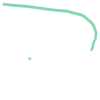

In [29]:
l.boundary
# (-122.39988955821444,
#  49.90312477812353,
#  -122.31049537724748,
#  49.95695321028581)

# To create the heat map, we will use the KDE plot method in geoplot. So we need to vary a density of points in the areas of interest. The density of points will be controlled by the distance proximity metric.
# To make sure that the points are placed inside the area where we would expect to find cobalt, we will randomly generate a point within the bounds of the new polygon region and use the polugon.intersects method to check if the point lies within the polygon

In [30]:
from shapely.geometry import Point
import numpy as np

In [31]:
test_df['proximity_percentage']

0    0.0
1    0.0
2    1.0
Name: proximity_percentage, dtype: float64

In [32]:
polygon = test_df.loc[2,'geometry']

proximity_percetage = test_df.loc[2,'proximity_percentage']
ppoints = []
minx, miny, maxx, maxy = polygon.envelope.bounds
while len(ppoints) < 100*proximity_percetage:
    x = (maxx - minx) * np.random.random_sample() + minx
    y = (maxy - miny) * np.random.random_sample() + miny
    p = Point(x, y)
    if polygon.intersects(p):
        ppoints.append(p)
        
points = gpd.GeoDataFrame({'geometry':ppoints, 'proximity_percentage':proximity_percetage}, index=range(len(ppoints)))

In [33]:
points

,geometry,proximity_percentage
0,POINT (-122.38865 49.95500),1.0
1,POINT (-122.36773 49.95319),1.0
2,POINT (-122.32927 49.94689),1.0
3,POINT (-122.32512 49.94582),1.0
4,POINT (-122.38059 49.95456),1.0
...,...,...
95,POINT (-122.31523 49.93897),1.0
96,POINT (-122.31233 49.92105),1.0
97,POINT (-122.39467 49.95590),1.0
98,POINT (-122.36823 49.95296),1.0


# Ploting constructed polygon "area of interest" beween two polygons

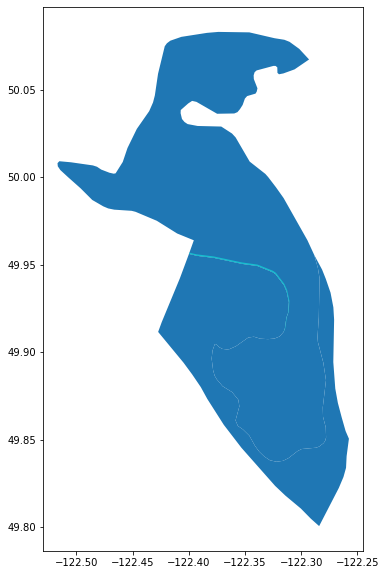

In [34]:
test_df.plot(column='proximity_percentage', categorical=True, figsize=(10,10))

# Using points to plot heat maps

/opt/anaconda3/envs/heatmap/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/heatmap/lib/python3.6/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


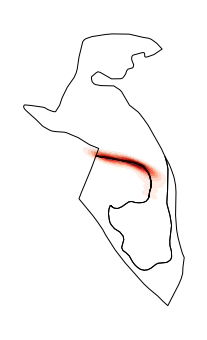

In [35]:
import geoplot
import geopandas

ax = geoplot.kdeplot(
    points, #clip=test_df.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(test_df, ax=ax, zorder=1)

In [36]:
plt.savefig('test_heat.jpg')

<Figure size 432x288 with 0 Axes>

/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

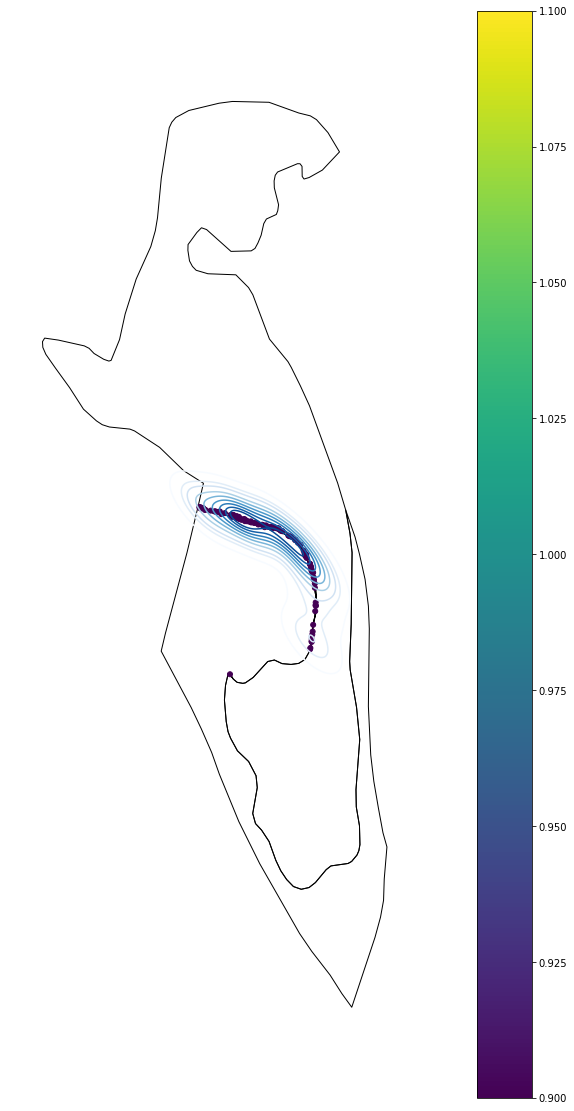

In [36]:
ax = geoplot.kdeplot(points,projection=geoplot.crs.AlbersEqualArea(), cmap='Blues', figsize=(20, 20))
ax = geoplot.pointplot(points, hue='proximity_percentage', legend=True, ax=ax)
ax = test_df.plot(column="proximity_percentage", ax=ax)
geoplot.polyplot(test_df[['geometry','proximity_percentage']], ax=ax)

# Encapsulating logic into functions

In [37]:
ceil_negative =lambda a: (abs(a)+a)/2

def calculate_fat_polygon(polygon_series, ind, limit_distance):
    """[summary]

    Args:
        polygon_series ([type]): [description]
        ind ([type]): [description]
        limit_distance ([type]): [description]

    Returns:
        [type]: [description]
    """

    minx, miny, maxx, maxy = polygon_series[ind].envelope.bounds

    hight = maxy - miny
    width = maxx - minx
    xfact = ((2*limit_distance)+width)/width
    yfact = ((2*limit_distance)+hight)/hight

    return polygon_series.scale(xfact=xfact, yfact=yfact, origin='center')


def create_points(polygon, proximity_percetage):
    """[summary]

    Args:
        new_gdf ([type]): [description]
        limit_distance ([type]): [description]
        i ([type]): [description]

    Returns:
        geopandas.GeoDataFrame: GeoDataFrame with points
    """

    points = []
    minx, miny, maxx, maxy = polygon.envelope.bounds
    while len(points) < 10*proximity_percetage:
        x = (maxx - minx) * np.random.random_sample() + minx
        y = (maxy - miny) * np.random.random_sample() + miny
        p = Point(x, y)
        if polygon.intersects(p):
            points.append(p)
    return points



def get_closest_polygon(polygon_series, spatial_index, target_rock_geometries, epsg_target_rock_geometries, limit_distance, ind, epsg_iterative_rock_geometry):
    """[summary]

    Args:
        polygon_series ([type]): [description]
        spatial_index ([type]): [description]
        target_rock_geometries ([type]): [description]
        epsg_target_rock_geometries ([type]): [description]
        limit_distance ([type]): [description]
        ind ([type]): [description]
        epsg_iterative_rock_geometry ([type]): [description]
    """
    
    fat_u = calculate_fat_polygon(polygon_series, ind, limit_distance)

    #Use R-tree to find close polygons
    possible_matches_index = list(spatial_index.intersection(fat_u[ind].bounds))
    possible_matches = target_rock_geometries.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(fat_u[ind])]
    proximity_metric = [ceil_negative(1-(polygon_series[ind].distance(p)/(limit_distance))) for p in precise_matches]

    pm_df = gpd.GeoDataFrame({
        'geometry': epsg_target_rock_geometries.loc[list(precise_matches.index)],
        'proximity_percentage':proximity_metric
    })
    
    if len(pm_df) == 0 :
        return gpd.GeoDataFrame(), gpd.GeoDataFrame(), gpd.GeoDataFrame()
    else:
        micro_gdf = gpd.GeoDataFrame(epsg_iterative_rock_geometry[[ind]])
        micro_gdf = micro_gdf.append(gpd.GeoDataFrame(epsg_target_rock_geometries.loc[list(precise_matches.index)]))
        micro_gdf['proximity_percentage'] = 0
        new_gdf = gpd.overlay(pm_df ,gpd.GeoDataFrame({'geometry':fat_u}).to_crs('EPSG:4326') , how='intersection')
        micro_gdf = micro_gdf.append(new_gdf).reset_index()
        multiple_p = []
        for i in new_gdf.index:
            polygon = new_gdf.loc[i,'geometry']
            proximity_percetage = new_gdf.loc[i,'proximity_percentage']
            points = create_points(polygon, proximity_percetage)
            multiple_p.extend(points)
                
        points = gpd.GeoDataFrame({'geometry':multiple_p, 'proximity_percentage':proximity_percetage}, index=range(len(multiple_p)))
        new_gdf['geometry'] = new_gdf.geometry.to_crs('EPSG:26910').centroid
        return micro_gdf, points, new_gdf

In [38]:
limit_distance = 10000

def get_all_close_pol_by_dist(limit_distance, ultramafic, granodiorite_pols):
    
    if len(ultramafic) > len(granodiorite_pols):
        target_rock_geometries = ultramafic
        iterative_rock_geometry = granodiorite_pols
    else:
        target_rock_geometries = granodiorite_pols
        iterative_rock_geometry = ultramafic

    spatial_index = target_rock_geometries.sindex
    cobalt_regions = gpd.GeoDataFrame()
    centroids = gpd.GeoDataFrame()
    Points = gpd.GeoDataFrame()
    distances = []
    ind = []
    
    epsg_iterative_rock_geometry = iterative_rock_geometry.to_crs('EPSG:4326')
    epsg_target_rock_geometries = target_rock_geometries.to_crs('EPSG:4326')
    i = 0
    for ind in tqdm(iterative_rock_geometry.index):
        polygon_series = iterative_rock_geometry[[ind]]
        
        cobalt_region, points, centroid  = get_closest_polygon(polygon_series, spatial_index, target_rock_geometries, epsg_target_rock_geometries, limit_distance, ind, epsg_iterative_rock_geometry)
        cobalt_regions = cobalt_regions.append(cobalt_region)
        Points = Points.append(points)
        centroids = centroids.append(centroid)

    cobalt_regions = cobalt_regions.drop_duplicates('geometry')
    Points = Points.drop_duplicates('geometry')
    return cobalt_regions, Points, centroids

# Running Job for the whole GeoDataFrame

In [39]:
%time close_matches, points, centroids = get_all_close_pol_by_dist(limit_distance, ultramafic, granodiorite_pols)

100%|██████████| 276/276 [00:57<00:00,  4.82it/s]


CPU times: user 53.2 s, sys: 3.96 s, total: 57.2 s
Wall time: 57.9 s


In [40]:
import geoplot
import geopandas

# Voilà !!!

/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


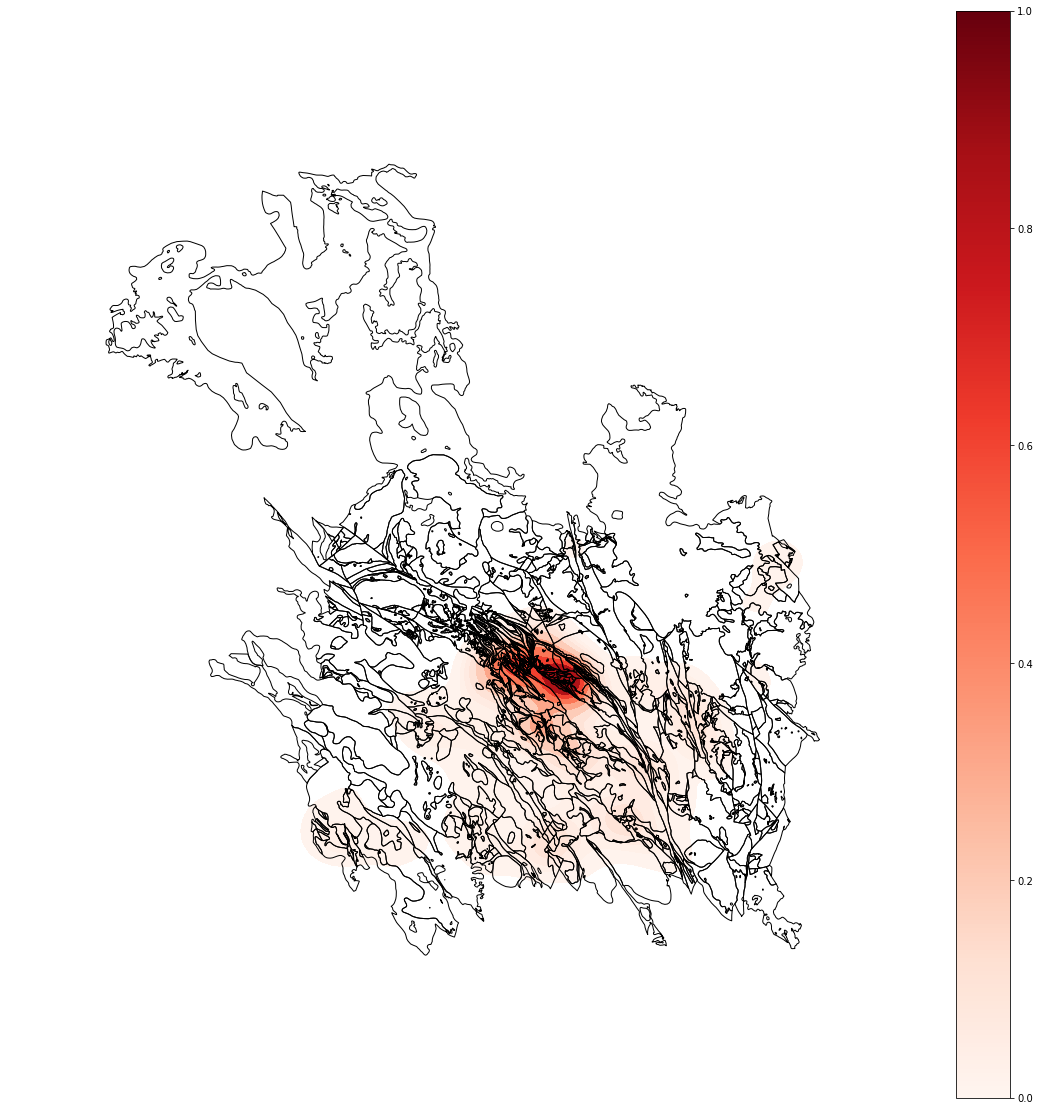

In [55]:
ax = geoplot.kdeplot(
    points, #clip=test_df.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea(),figsize=(20, 20))
ax = geoplot.pointplot(centroids, hue='proximity_percentage', legend=True, ax=ax, cmap='Reds')
fig = geoplot.polyplot(bedrock_data.to_crs('EPSG:4326'), ax=ax, zorder=1)
plt.savefig('foo.png')

In [46]:
from matplotlib.figure import Figure

In [54]:
from matplotlib.backends.backend_pgf import F

[]

In [42]:
# ax = geoplot.kdeplot(
#     points, #clip=test_df.geometry,
#     shade=True, cmap='Reds',
#     projection=geoplot.crs.AlbersEqualArea(),figsize=(20, 20))
# ax = geoplot.pointplot(centroids, hue='proximity_percentage', legend=True, ax=ax, cmap='Reds')
# geoplot.polyplot(bedrock_data.to_crs('EPSG:4326'), ax=ax, zorder=1)

/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/cobalt/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

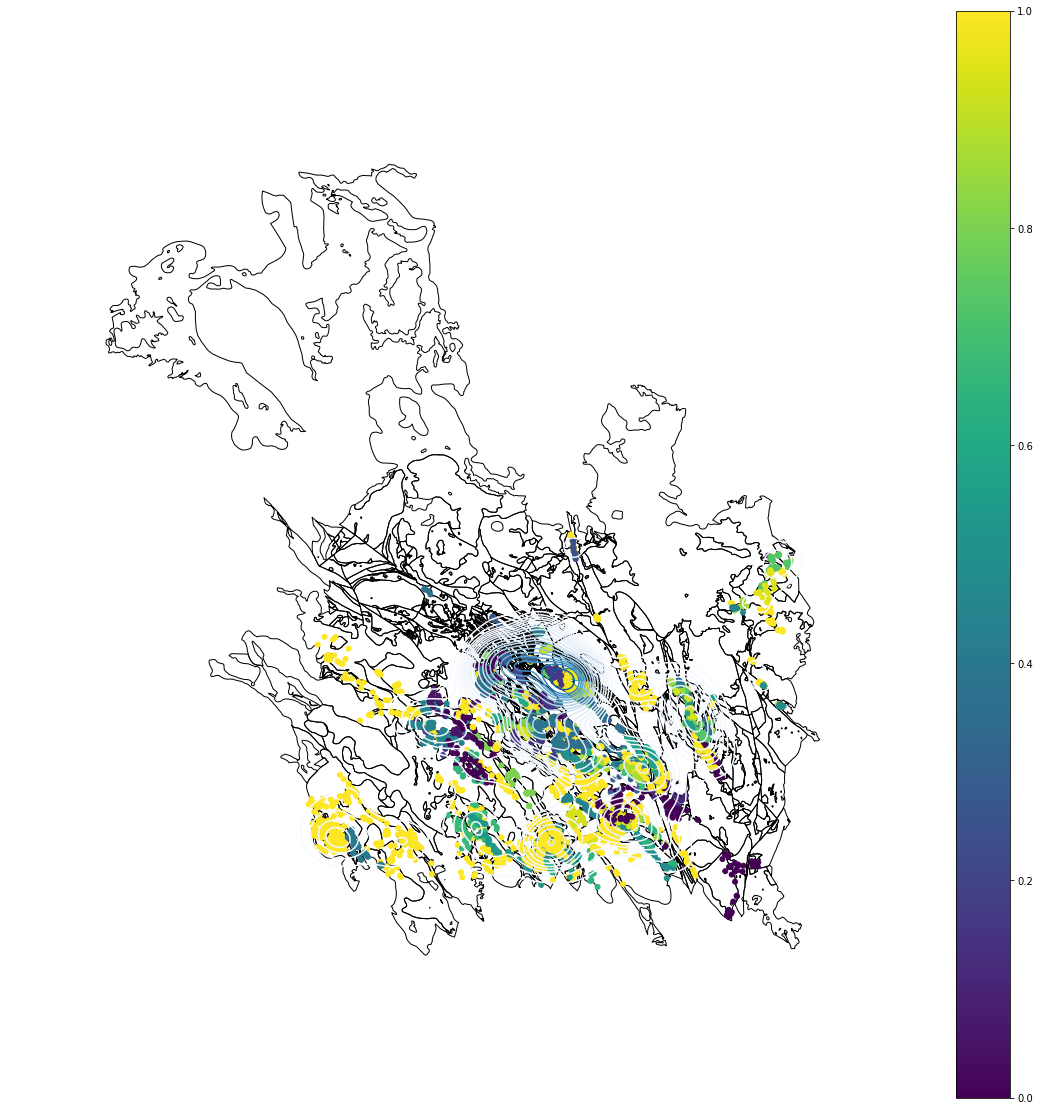

In [43]:
ax = geoplot.kdeplot(points,projection=geoplot.crs.AlbersEqualArea(), n_levels=20, cmap='Blues', figsize=(20, 20))
ax = geoplot.pointplot(points, hue='proximity_percentage', legend=True, ax=ax)
geoplot.polyplot(bedrock_data.to_crs('EPSG:4326'), ax=ax)